# 3) Price–Spec Correlation: Do Better Specs Always Mean Higher Prices?

This section investigates the quantitative relationship between smartphone specifications and pricing.  
The objective is to identify which technical features scale proportionally with price and which exhibit weaker or inconsistent influence.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

DATA_PATH = "data/processed/all_brands_20k.csv"
FIG_DIR = "analysis/figures"
os.makedirs(FIG_DIR, exist_ok=True)

df = pd.read_csv(DATA_PATH)

numeric_cols = [
    "price",
    "ram_gb",
    "storage_gb",
    "display_inch",
    "battery_mah",
    "camera_mp"
]

df = df[numeric_cols].dropna()

In [4]:
# Correlation Matrix
corr = df.corr(numeric_only=True).round(2)
corr

,price,ram_gb,storage_gb,display_inch,battery_mah,camera_mp
price,1.00,0.54,0.47,0.11,-0.10,0.12
ram_gb,0.54,1.00,0.67,0.35,0.19,0.08
storage_gb,0.47,0.67,1.00,0.27,0.20,0.09
display_inch,0.11,0.35,0.27,1.00,0.53,0.21
battery_mah,-0.10,0.19,0.20,0.53,1.00,0.03
camera_mp,0.12,0.08,0.09,0.21,0.03,1.00


---
## Correlation Heatmap

This heatmap visualizes the pairwise Pearson correlation coefficients between price and core technical specifications.

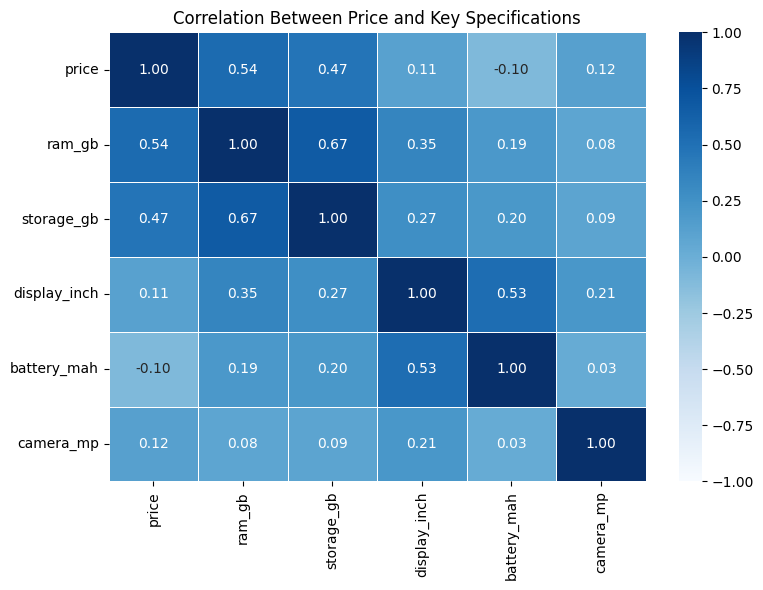

Saved: analysis/figures\price_spec_correlation_heatmap.png


In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=True,
    cmap="Blues",
    fmt=".2f",
    vmin=-1,
    vmax=1,
    linewidths=0.5
)
plt.title("Correlation Between Price and Key Specifications")
plt.tight_layout()

fig_path_heat = os.path.join(FIG_DIR, "price_spec_correlation_heatmap.png")
plt.savefig(fig_path_heat, dpi=200, bbox_inches="tight")
plt.show()

print(f"Saved: {fig_path_heat}")

---
## Price vs Individual Specifications

Scatter plots illustrate how price changes with each specification.  
Linear trendlines are added to highlight whether the relationship is positive, weak, or nonlinear.

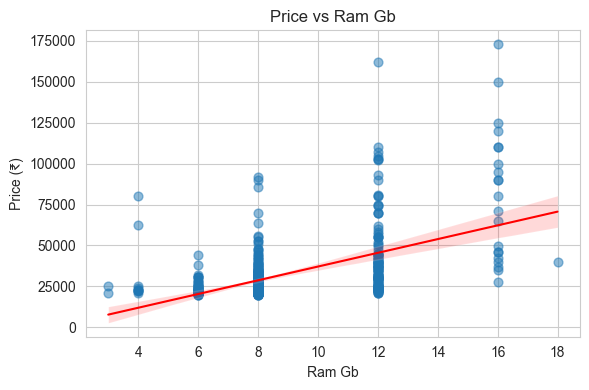

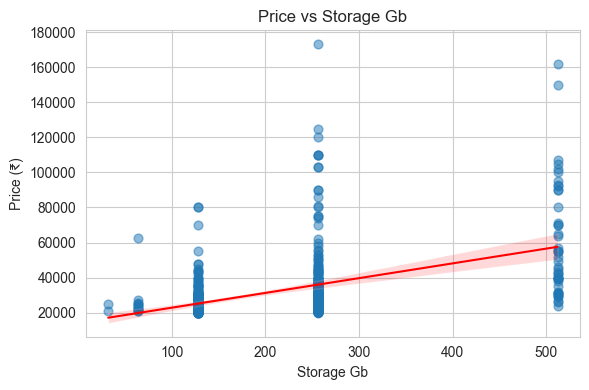

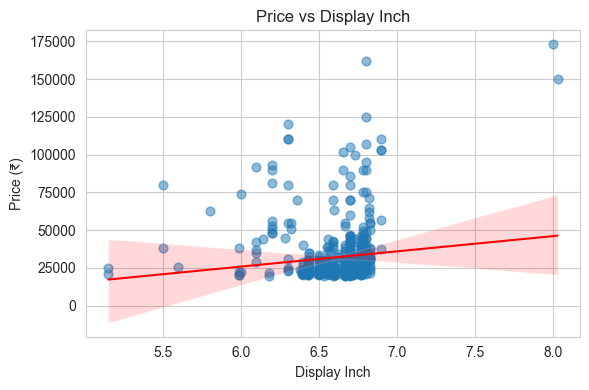

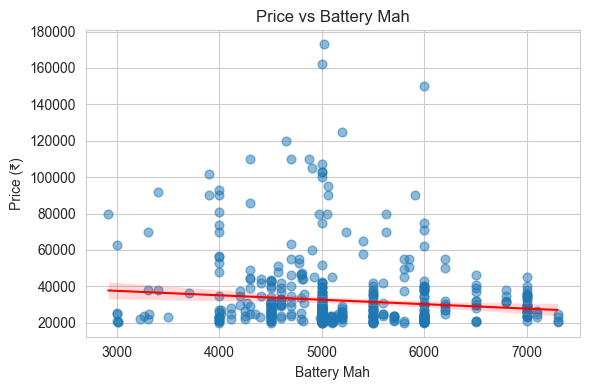

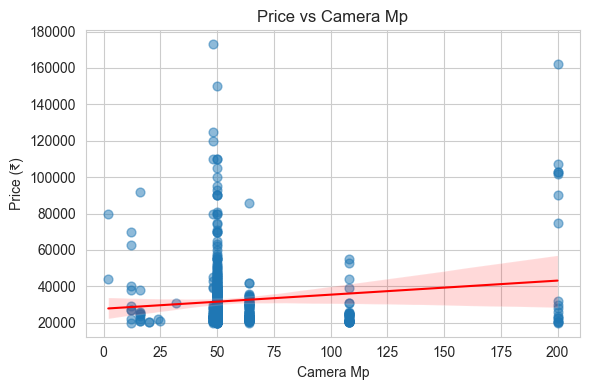

All scatter plots saved.


In [8]:
sns.set_style("whitegrid")

spec_features = ["ram_gb", "storage_gb", "display_inch", "battery_mah", "camera_mp"]

for feature in spec_features:
    plt.figure(figsize=(6, 4))
    sns.regplot(
        data=df,
        x=feature,
        y="price",
        scatter_kws={"alpha": 0.5, "s": 40},
        line_kws={"color": "red", "lw": 1.5}
    )
    plt.title(f"Price vs {feature.replace('_', ' ').title()}")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel("Price (₹)")
    plt.tight_layout()

    fig_path = os.path.join(FIG_DIR, f"price_vs_{feature}.png")
    plt.savefig(fig_path, dpi=200, bbox_inches="tight")
    plt.show()

print("All scatter plots saved.")

---
# Summary & Insights — Price–Spec Correlation

### Overview
This analysis examines how key smartphone specifications correlate with pricing to identify which hardware factors most influence a phone’s market value. Pearson correlation coefficients were calculated between price and five major specs: RAM, storage, display size, battery capacity, and camera megapixels. Scatter plots were used to visually validate each relationship.

### Correlation Summary
| Specification | Correlation w/ Price | Relationship Strength |
|----------------|----------------------|------------------------|
| RAM (GB) | **0.54** | Strong Positive |
| Storage (GB) | **0.47** | Moderate–Strong Positive |
| Display Size (inches) | **0.11** | Very Weak Positive |
| Battery Capacity (mAh) | **–0.10** | Very Weak Negative |
| Camera Megapixels | **0.12** | Very Weak Positive |

### Key Observations
- **RAM and Storage:**  
  Both show clear positive relationships with price. The trendlines in the scatter plots are almost linear, confirming that higher-priced phones generally correspond to higher RAM and storage configurations. However, 256 GB models appear most common across all tiers, indicating that internal storage is approaching a saturation standard.
  
- **Display Size:**  
  Displays cluster tightly between **6.3–6.8 inches** across the entire price spectrum. This suggests that screen size has become a *standardized design feature* rather than a differentiator; most phones adopt near-uniform dimensions regardless of pricing.

- **Battery Capacity:**  
  The scatter plot shows minimal relationship — in fact, a slight downward trend. Many ₹20k-range devices feature **5000–6000 mAh** batteries, often exceeding those of premium models. This confirms that large batteries are no longer a premium characteristic but a baseline expectation.

- **Camera Megapixels:**  
  While higher price tiers introduce 108 MP and 200 MP sensors, even entry-tier models offer similar specs on paper. The weak correlation and wide scatter indicate that camera quality (sensor type, processing, optics) matters more than megapixel count — a feature where marketing often exceeds measurable differentiation.

### Interpretation
- **Performance-linked specs (RAM and storage)** are the strongest price drivers — logical since they directly affect user experience and cost of materials.  
- **Battery and display size** have reached *feature maturity*: nearly uniform across price points, offering little contribution to perceived or actual price differences.  
- **Camera megapixels** show that spec count alone doesn’t justify pricing; qualitative camera features and brand perception likely influence premiums instead.

### Implications
- **For Consumers:** Paying more generally yields better performance (RAM/storage) but not necessarily larger screens, longer battery life, or superior camera results based on megapixels alone.  
- **For Analysts:** When modeling price or predicting value, focus on **RAM, storage, and brand** as the primary explanatory factors.  
- **For Manufacturers:** Future differentiation at mid-premium levels must emphasize *camera processing quality, materials, and user experience*, as hardware specs alone are converging.

---